# <u>Submission instructions</u>
### Submission in pairs unless otherwise authorized
<ul style="font-size: 17px">
<li> This notebook contains all the questions. You should follow the instructions below.</li>
<li> Solutions for both theoretical and practical parts should be written in this notebook</li>
</ul>

<h3> Moodle submission</h3>


<p style="font-size: 17px">
You should submit three files:
</p>
<ul style="font-size: 17px">
<li>IPYNB notebook:
  <ul>
  <li>All the wet and dry parts, including code, graphs, discussion, etc.</li>
  </ul>
</li>
<li>PDF file:
  <ul>
  <li>Export the notebook to PDF. Make sure that all the cells are visible.</li>
  </ul>
</li>
<li>Pickle files:
  <ul>
    <li>As requested in Q2.a and Q3.a</li>
  </ul>
</li>
<li> PY file:
  <ul>
   <li> As requested in Q3.a</li>
   </ul>
   </li>
</ul>
<p style="font-size: 17px">
All files should be in the following format: "HW1_ID1_ID2.file"
<br>
Good Luck!
</p>

<h1> Question 1</h1>

## I. Softmax Derivative (10pt)

<p style="font-size: 17px">
Derive the gradients of the softmax function and demonstrate how the expression can be reformulated solely by using the softmax function, i.e., in some expression where only $softmax(x)$, but not $x$, is present). Recall that the softmax function is defined as follows:

$$softmax(x)_i = \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}}$$

## 1. Compute the Partial Derivative

We take the derivative of $\(softmax(x)_i\)$ with respect to $\(x_k\)$:

### Step 1: Expand the softmax definition

$$
\frac{\partial softmax(x)_i}{\partial x_k} = \frac{\partial}{\partial x_k} \left( \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \right)
$$

### Step 2: Apply the quotient rule

The derivative of a quotient $\( \frac{f(x)}{g(x)} \)$ is:

$$
\frac{d}{dx} \left( \frac{f(x)}{g(x)} \right) = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}
$$

Here:
- $ \( f(x) = e^{x_i} \)$
- $\( g(x) = \sum_{j=1}^{N} e^{x_j} \)$

Substitute \(f(x)\) and \(g(x)\) into the quotient rule:

$$
\frac{\partial softmax(x)_i}{\partial x_k} =
\frac{\frac{\partial e^{x_i}}{\partial x_k} \cdot \sum_{j=1}^{N} e^{x_j} - e^{x_i} \cdot \frac{\partial \sum_{j=1}^{N} e^{x_j}}{\partial x_k}}{\left( \sum_{j=1}^{N} e^{x_j} \right)^2}
$$

---

## 2. Compute Each Term in the Derivative

### (a) Derivative of the numerator (\(f'(x)\)):
The derivative of $\( e^{x_i} \)$ with respect to $\( x_k \)$ is:

$$
\frac{\partial e^{x_i}}{\partial x_k} =
\begin{cases}
e^{x_i}, & \text{if } i = k \\
0, & \text{if } i \neq k
\end{cases}
$$

This can be written as $\( \delta_{ik} \cdot e^{x_i} \)$, where $\(\delta_{ik}\)$ is the Kronecker delta:

$$
\delta_{ik} =
\begin{cases}
1, & \text{if } i = k \\
0, & \text{if } i \neq k
\end{cases}
$$

### (b) Derivative of the denominator (\(g'(x)\)):

The derivative of the sum $\( \sum_{j=1}^{N} e^{x_j} \)$ with respect to $\( x_k \)$ is:

$$
\frac{\partial \sum_{j=1}^{N} e^{x_j}}{\partial x_k} = e^{x_k}
$$

---

## 3. Substitute Back into the Derivative

Substitute $\( f'(x) \)$ and $\( g'(x) \)$ into the quotient rule:

$$
\frac{\partial softmax(x)_i}{\partial x_k} =
\frac{\delta_{ik} \cdot e^{x_i} \cdot \sum_{j=1}^{N} e^{x_j} - e^{x_i} \cdot e^{x_k}}{\left( \sum_{j=1}^{N} e^{x_j} \right)^2}
$$

---

## 4. Factorize Terms

Factor $\(e^{x_i}\)$ from the numerator:

$$
\frac{\partial softmax(x)_i}{\partial x_k} =
\frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} \cdot \left( \delta_{ik} - \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}} \right)
$$

Notice that:

- $\( \frac{e^{x_i}}{\sum_{j=1}^{N} e^{x_j}} = softmax(x)_i \)$
- $\( \frac{e^{x_k}}{\sum_{j=1}^{N} e^{x_j}} = softmax(x)_k \)$

---
## Substitute these back using the $\(\delta_{ik}\)$  Kronecker delta to get the Final Result:

$$
\frac{\partial softmax(x)_i}{\partial x_k} = softmax(x)_i \cdot (\delta_{ik} - softmax(x)_k)
$$

$$
\delta_{ik} =
\begin{cases}
1, & \text{if } i = k \\
0, & \text{if } i \neq k
\end{cases}
$$


## II. Cross-Entropy Gradient (10pt)
<p style="font-size: 17px">
Derive the gradient of cross-entropy loss with regard to the inputs of a softmax function. i.e., find the gradients with respect to the softmax input vector $\theta$, when the prediction is denoted by $\hat{y} = softmax(\theta)$. Remember the cross entropy function is:
$$CE(y, \hat{y}) = -\sum_i y_i log(\hat{y_i})$$


<p style="font-size: 17px">where $y$ is the one-hot label vector, and $\hat{y}$ is the predicted probability vector for all classes. 

### II. Cross-Entropy Gradient - Answer

The cross-entropy loss is defined as:
$$
CE(y, \hat{y}) = -\sum_{i} y_i \log(\hat{y}_i)
$$
where:
- $\(y\)$ is the one-hot encoded true label vector.
- $\(\hat{y} = softmax(\theta)\)$ is the predicted probability vector.

The softmax function is:
$$
softmax(\theta)_i = \frac{e^{\theta_i}}{\sum_{j} e^{\theta_j}}
$$

### Step 1: Substitute $\(\hat{y}\)$ into the loss function
The cross-entropy loss becomes:
$$
CE(y, \hat{y}) = -\sum_{i} y_i \log\left(\frac{e^{\theta_i}}{\sum_{j} e^{\theta_j}}\right)
$$

Simplify:
$$
CE(y, \hat{y}) = -\sum_{i} y_i \left[\theta_i - \log\left(\sum_{j} e^{\theta_j}\right)\right]
$$

### Step 2: Compute the gradient with respect to $\(\theta_k\)$
The gradient is:
$$
\frac{\partial CE(y, \hat{y})}{\partial \theta_k} = -\sum_{i} \frac{\partial}{\partial \theta_k} \left[y_i \left(\theta_i - \log\left(\sum_{j} e^{\theta_j}\right)\right)\right]
$$

Separate the terms:
1. For $\(\theta_i\)$:
   $$\frac{\partial}{\partial \theta_k} \theta_i = \delta_{ik}$$
   (where $\(\delta_{ik}\)$ is the Kronecker delta).

2. For $\(\log\left(\sum_{j} e^{\theta_j}\right)\)$:
   $$\frac{\partial}{\partial \theta_k} \log\left(\sum_{j} e^{\theta_j}\right) = \frac{e^{\theta_k}}{\sum_{j} e^{\theta_j}} = softmax(\theta)_k$$

Combine:
$$
\frac{\partial CE(y, \hat{y})}{\partial \theta_k} = -y_k + softmax(\theta)_k
$$

### Final Gradient:
Using $\(\hat{y}_k = softmax(\theta)_k\)$, the gradient of the cross-entropy loss with respect to $\(\theta_k\)$ is:
$$
\frac{\partial CE(y, \hat{y})}{\partial \theta_k} = \hat{y}_k - y_k
$$


# Question 2

## I. Derivative Of Activation Functions (10pt)

<p style="font-size: 17px">
The following cell contains an implementation of some activation functions. Implement the corresponding derivatives.</p>

In [1]:
import torch

def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

def tanh(x):
    return torch.div(torch.exp(x) - torch.exp(-x), torch.exp(x) + torch.exp(-x))


def softmax(x):
    exp_x = torch.exp(x.T - torch.max(x, dim=-1).values).T  # Subtracting max(x) for numerical stability
    return exp_x / exp_x.sum(dim=-1, keepdim=True)

In [2]:
import torch

def d_sigmoid(x):
    """
    Computes the derivative of the sigmoid function.
    """
    sigmoid_x = 1 / (1 + torch.exp(-x))
    return sigmoid_x * (1 - sigmoid_x)


def d_tanh(x):
    """
    Computes the derivative of the tanh function.
    """
    return 1 - torch.tanh(x) ** 2


def d_softmax(x):
    """
    Computes the Jacobian matrix of the softmax function for a single input vector `x`.
    """
    s = torch.softmax(x, dim=0)  # Compute softmax
    s = s.unsqueeze(1)  # Reshape to column vector
    return torch.diag(s.flatten()) - torch.mm(s, s.T)  # Jacobian matrix


## II. Train a Fully Connected network on MNIST (30pt)

<p style="font-size: 17px">In the following exercise, you will create a classifier for the MNIST dataset.
You should write your own training and evaluation code and meet the following
constraints:
<ul>
<li> You are only allowed to use torch tensor manipulations.</li>
<li> You are NOT allowed to use:
  <ul>
  <li> Auto-differentiation - backward()</li>
  <li> Built-in loss functions</li>
  <li> Built-in activations</li>
  <li> Built-in optimization</li>
  <li> Built-in layers (torch.nn)</li>
  </ul>
  </li>
</ul>
</h4>

<p style="font-size: 17px">
 a) The required classifier class is defined.
<ul style="font-size: 17px">
<li> You should implement the forward and backward passes of the model.
<li> Train the model and plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li> You should save the model's weights and biases. Change the student_ids to yours.
</ul>
<p style="font-size: 17px">In this section, you <b>must</b> use the "set_seed" function with the given seed and <b>sigmoid</b> as an activation function.
</p>

In [3]:
import torch
import torchvision
from torch.utils.data import DataLoader
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Constants
SEED = 42
EPOCHS = 16
BATCH_SIZE = 32
NUM_OF_CLASSES = 10

# Setting seed
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)


# Transformation for the data
transform = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(),
     torch.flatten])



# Cross-Entropy loss implementation
def one_hot(y, num_of_classes=10):
    hot = torch.zeros((y.size()[0], num_of_classes))
    hot[torch.arange(y.size()[0]), y] = 1
    return hot

def cross_entropy(y, y_hat):
    return -torch.sum(one_hot(y) * torch.log(y_hat)) / y.size()[0]

In [4]:
# Create dataloaders
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size = BATCH_SIZE)


test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [5]:
class FullyConnectedNetwork:
    def __init__(self, input_size, output_size, hidden_size1, activiation_func, lr=0.01):
        # parameters
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size1 = hidden_size1

        # activation function
        self.activation_func = activiation_func

        # weights
        self.W1 = torch.randn(self.input_size, self.hidden_size1)
        self.b1 = torch.zeros(self.hidden_size1)

        self.W2 = torch.randn(self.hidden_size1, self.output_size)
        self.b2 = torch.zeros(self.output_size)

        self.lr = lr

    def forward(self, x):
        """
        Perform the forward pass.
        """
        # Layer 1: Linear transformation + activation
        self.z1 = torch.matmul(x, self.W1) + self.b1
        self.a1 = self.activation_func(self.z1)

        # Layer 2: Linear transformation + softmax
        self.z2 = torch.matmul(self.a1, self.W2) + self.b2
        self.y_hat = torch.softmax(self.z2, dim=1)

        return self.y_hat

    def backward(self, x, y, y_hat):
        """ Perform the backward pass and update the weights using gradient descent. 
        """
        m = y.size(0)  # Batch size
        y_one_hot = one_hot(y, self.output_size)  # Convert labels to one-hot vectors

        # Compute gradients for the second layer
        dz2 = (y_hat - y_one_hot) / m
        dW2 = torch.matmul(self.a1.T, dz2)
        db2 = torch.sum(dz2, dim=0)

        # Compute gradients for the first layer
        da1 = torch.matmul(dz2, self.W2.T)
        dz1 = da1 * d_sigmoid(self.z1)  # Element-wise product
        dW1 = torch.matmul(x.T, dz1)
        db1 = torch.sum(dz1, dim=0)

        # Update weights and biases
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1

In [6]:
set_seed(SEED)
model = FullyConnectedNetwork(784, 10, 128, sigmoid, lr=0.01)

In [7]:
def train_model(model, train_loader, test_loader, epochs, lr):
    """
    Trains and evaluates the model for the specified number of epochs.

    Args:
        model (FullyConnectedNetwork): The model to train.
        train_loader (DataLoader): Dataloader for the training set.
        test_loader (DataLoader): Dataloader for the test set.
        epochs (int): Number of epochs to train the model.
        lr (float): Learning rate for the model.

    Returns:
        dict: A dictionary containing training and testing metrics:
              - "train_losses"
              - "test_losses"
              - "train_accuracies"
              - "test_accuracies"
    """
    # Set the learning rate
    model.lr = lr

    # Tracking metrics
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    # Track the best test accuracy
    best_accuracy = 0.0

    for epoch in range(epochs):
        # Training phase
        total_loss, correct = 0, 0
        for images, labels in train_loader:
            # Flatten the images
            images = images.view(-1, 784)

            # Forward pass
            y_hat = model.forward(images)

            # Compute loss
            loss = cross_entropy(labels, y_hat)

            # Backward pass
            model.backward(images, labels, y_hat)

            # Update metrics
            total_loss += loss.item()
            correct += (torch.argmax(y_hat, dim=1) == labels).sum().item()

        # Calculate epoch loss and accuracy for training
        train_loss = total_loss / len(train_loader)
        train_accuracy = correct / len(train_loader.dataset)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Evaluation phase
        total_loss, correct = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.view(-1, 784)

                # Forward pass
                y_hat = model.forward(images)

                # Compute loss
                loss = cross_entropy(labels, y_hat)

                # Update metrics
                total_loss += loss.item()
                correct += (torch.argmax(y_hat, dim=1) == labels).sum().item()

        # Calculate epoch loss and accuracy for testing
        test_loss = total_loss / len(test_loader)
        test_accuracy = correct / len(test_loader.dataset)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Save the best model
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            torch.save(
                {"W1": model.W1, "W2": model.W2, "b1": model.b1, "b2": model.b2},
                f"HW1_Q2_208302661_318159506.pkl"
            )

    # Return all metrics
    return {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accuracies": train_accuracies,
        "test_accuracies": test_accuracies,
    }


<p style="font-size: 17px"> b) Train the model with various learning rates (at least 3).
<ul style="font-size: 17px">
<li> Plot the model's accuracy and loss (both on train and test sets) as a function of the epochs.
<li>Discuss the differences in training with different learning rates. Support your answer with plots.


Training with learning rate: 0.001


Training with learning rate: 0.01


Training with learning rate: 0.1


Training with learning rate: 0.5



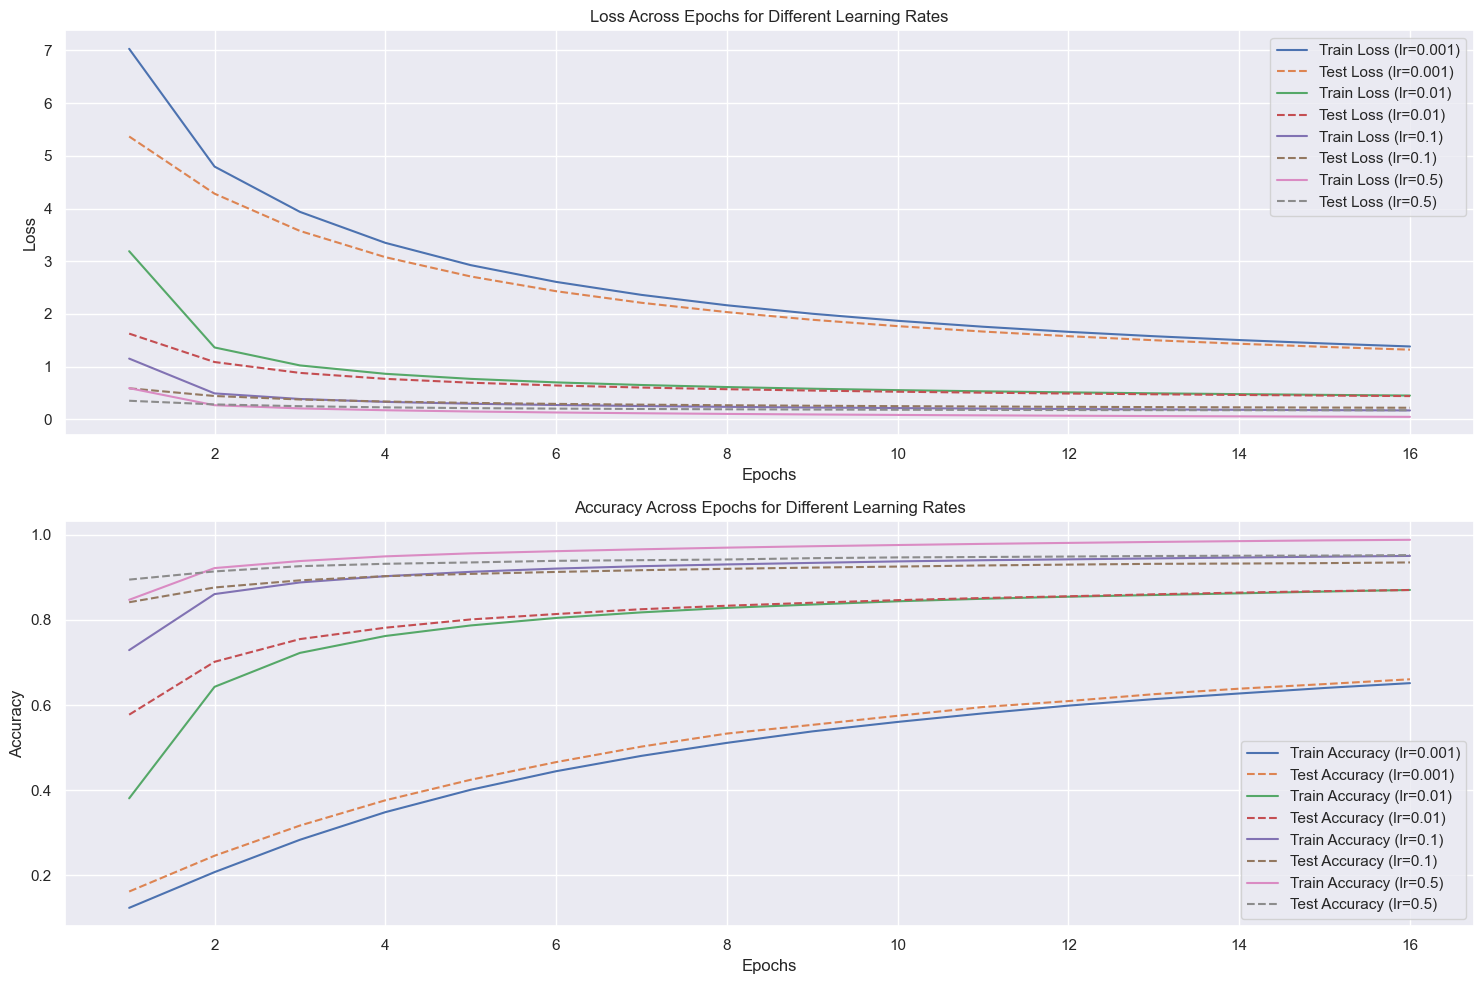

In [8]:
# Experiment with multiple learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}\n")
    
    # Initialize a new model for each learning rate
    model = FullyConnectedNetwork(784, 10, 128, sigmoid)
    
    # Train the model using the training loop function
    metrics = train_model(model, train_dataloader, test_dataloader, EPOCHS, lr)
    
    # Store results for the current learning rate
    results[lr] = metrics

# Plot the model's accuracy and loss as a function of epochs for all learning rates
plt.figure(figsize=(15, 10))

# Loss Plot
plt.subplot(2, 1, 1)
for lr, metrics in results.items():
    plt.plot(range(1, EPOCHS + 1), metrics["train_losses"], label=f"Train Loss (lr={lr})")
    plt.plot(range(1, EPOCHS + 1), metrics["test_losses"], linestyle="--", label=f"Test Loss (lr={lr})")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Across Epochs for Different Learning Rates")
plt.legend()

# Accuracy Plot
plt.subplot(2, 1, 2)
for lr, metrics in results.items():
    plt.plot(range(1, EPOCHS + 1), metrics["train_accuracies"], label=f"Train Accuracy (lr={lr})")
    plt.plot(range(1, EPOCHS + 1), metrics["test_accuracies"], linestyle="--", label=f"Test Accuracy (lr={lr})")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Across Epochs for Different Learning Rates")
plt.legend()

plt.tight_layout()
plt.show()


# Learning Rate Summary

## Key Observations
- **Small Learning Rates (e.g., 0.001):**  
  Stable but slow convergence; accuracy stabilizes around `0.8`.
- **Moderate Learning Rates (e.g., 0.01, 0.1):**  
  Fast convergence with good generalization, achieving accuracy above `0.9`.
- **High Learning Rates (e.g., 0.5):**  
  Rapid learning but unstable, with lower test accuracy and risk of overfitting.

## Recommendation
A learning rate between `0.01` and `0.1` provides the best balance between speed and performance. 


# Question 3

## I. Implement and Train a CNN (30pt)

<p style="font-size: 17px"> As you might know, there are many dogs on campus. Sometimes, understanding the emotions of a dog can be challenging, and people might mistakenly try to pet it when it is sad or angry. As a data scientist, you have been asked to assist Technion's students. Your task is to create a "dog emotion classifier.
<br>
Your code should meet the following constraints:
<ul style="font-size: 17px">
<li> Your classifier must be CNN based</li>
<li> You are not allowed to use any pre-trained model</li>
</ul>
<br>
<p style="font-size: 17px">
To satisfy your boss, your model must achieve at least 70% accuracy on the test set. Your boss also emphasized that the model will be deployed on smartphones, so it should have a small number of parameters. 25% of your grade for this task will be based on the number of parameters your model uses — fewer parameters will yield a higher grade.</p>

#### Stages
<ol style="font-size: 17px"> 
<li>Perform a short EDA (Exploratory Data Analysis).</li>
 <li>Train the model and plot its accuracy and loss (for both the training and validation sets) as a function of the epochs.</li>
  <li>Report the test set accuracy.</li>
   <li>Discuss the progress you made and describe your final model.</li>
    </ol>
<br>
 Your data is in <code>hw1_data/dog_emotion</code>.
<br>
Tou can define a custom dataset (as in tutorial 3) or use <code>torchvision.datasets.ImageFolder</code>.

 #### Submission
 <p style="font-size: 17px"> In addition to the code in the notebook, you should submit:
<ul style="font-size: 17px">
<li> a <code>.py</code> file containing your model class.</li>
<li> a <code>.pkl</code> file containing the weight of your model</li>
</ul>

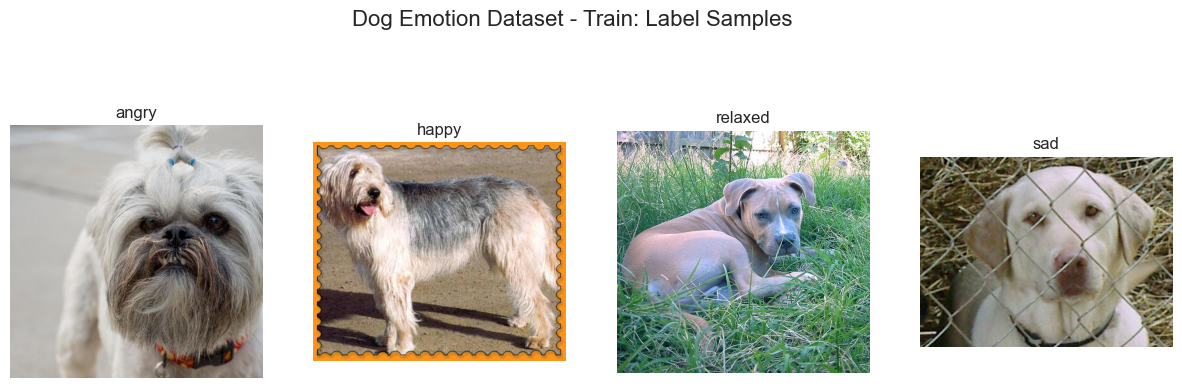

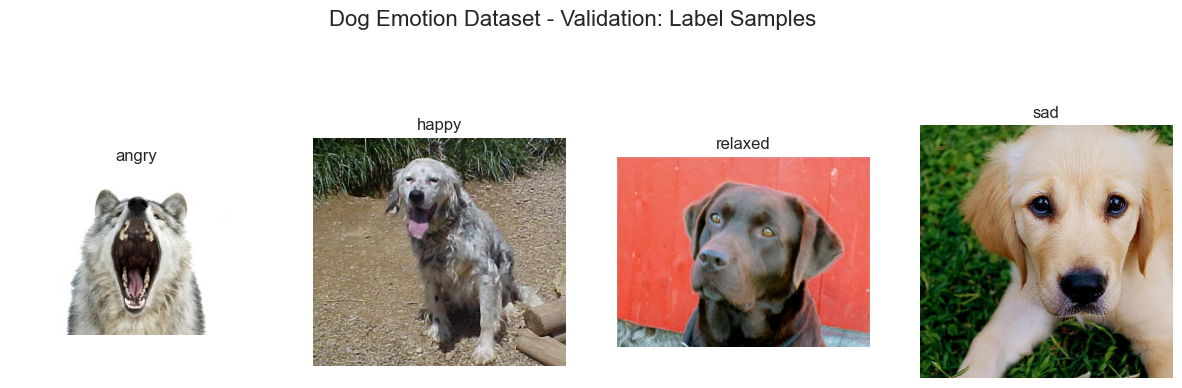

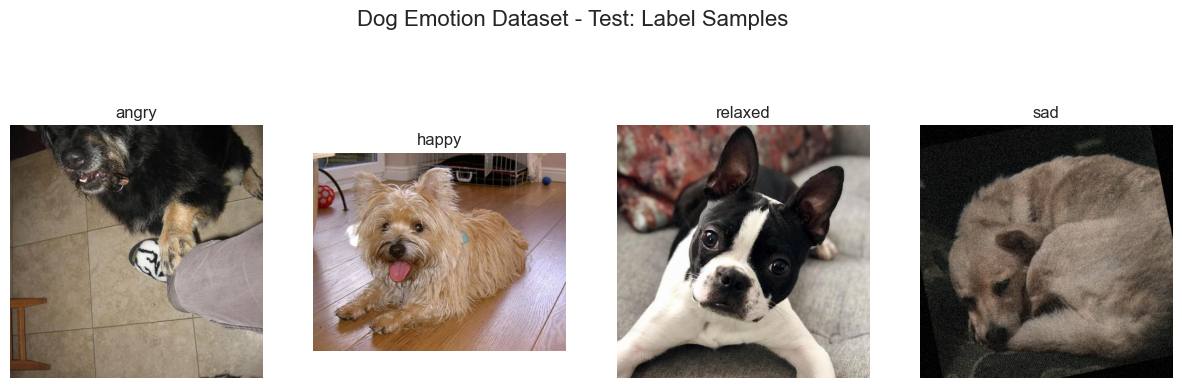

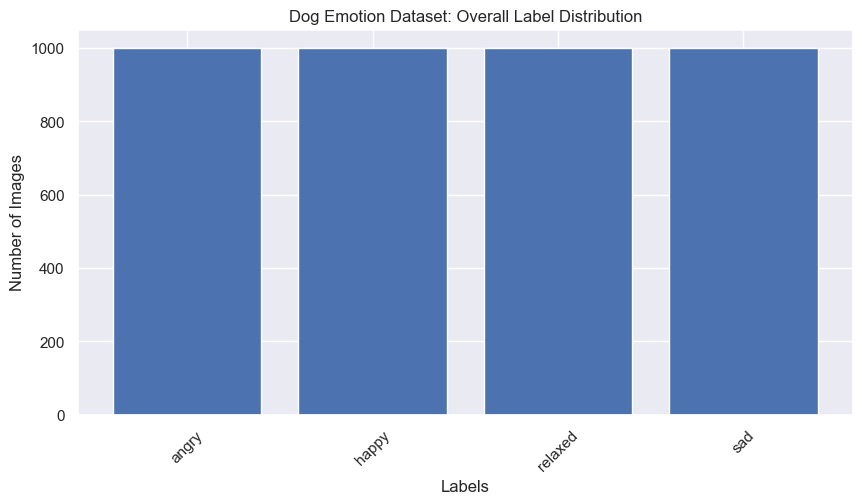


Dataset Sizes:
Train: 2800 images
Validation: 400 images
Test: 800 images
Classes: ['angry', 'happy', 'relaxed', 'sad']



In [9]:
# ============================
# STEP 1: EDA 
# ============================

import os
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# Define a function to count labels and display a sample image from each label
def dataset_eda_with_stats(dataset_dirs, title):
    label_counts = Counter()
    sample_images = {}
    dataset_sizes = {}

    # Iterate through each dataset (train, val, test)
    for dataset_name, dataset_dir in dataset_dirs.items():
        current_counts = Counter()
        current_samples = {}
        total_images = 0
        
        # Iterate through each label folder
        for label in os.listdir(dataset_dir):
            label_path = os.path.join(dataset_dir, label)
            if os.path.isdir(label_path):
                images = os.listdir(label_path)
                current_counts[label] = len(images)
                total_images += len(images)
                if images:
                    current_samples[label] = os.path.join(label_path, images[0])  # First image as a sample

        label_counts.update(current_counts)
        sample_images[dataset_name] = current_samples
        dataset_sizes[dataset_name] = total_images

        # Display the sample images for the current dataset
        fig, axes = plt.subplots(1, len(current_samples), figsize=(15, 5))
        fig.suptitle(f'{title} - {dataset_name}: Label Samples', fontsize=16)
        for ax, (label, image_path) in zip(axes, current_samples.items()):
            img = Image.open(image_path)
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(label)
        plt.show()

    # Show the overall label counts as a bar chart
    plt.figure(figsize=(10, 5))
    plt.bar(label_counts.keys(), label_counts.values())
    plt.title(f'{title}: Overall Label Distribution')
    plt.xlabel('Labels')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45)
    plt.show()

    # Print dataset stats
    print(f"\nDataset Sizes:")
    for dataset_name, size in dataset_sizes.items():
        print(f"{dataset_name}: {size} images")
    print(f"Classes: {sorted(label_counts.keys())}\n")

# Define the dataset paths
train_dir = 'hw1_data/dog_emotion/train'
val_dir = 'hw1_data/dog_emotion/val'
test_dir = 'hw1_data/dog_emotion/test'

# Run the EDA on train, validation, and test datasets
dataset_dirs = {
    "Train": train_dir,
    "Validation": val_dir,
    "Test": test_dir
}
dataset_eda_with_stats(dataset_dirs, 'Dog Emotion Dataset')



Epoch [1/300] Train Loss: 1.3849, Train Acc: 26.61% | Val Loss: 1.3759, Val Acc: 30.00%
Epoch [2/300] Train Loss: 1.3690, Train Acc: 27.64% | Val Loss: 1.3644, Val Acc: 32.25%
Epoch [3/300] Train Loss: 1.3633, Train Acc: 28.93% | Val Loss: 1.3565, Val Acc: 31.25%
Epoch [4/300] Train Loss: 1.3593, Train Acc: 26.61% | Val Loss: 1.3524, Val Acc: 32.00%
Epoch [5/300] Train Loss: 1.3502, Train Acc: 28.21% | Val Loss: 1.3434, Val Acc: 32.00%
Epoch [6/300] Train Loss: 1.3457, Train Acc: 30.75% | Val Loss: 1.3434, Val Acc: 32.50%
Epoch [7/300] Train Loss: 1.3455, Train Acc: 30.46% | Val Loss: 1.3369, Val Acc: 31.50%
Epoch [8/300] Train Loss: 1.3363, Train Acc: 28.89% | Val Loss: 1.3335, Val Acc: 32.75%
Epoch [9/300] Train Loss: 1.3372, Train Acc: 30.39% | Val Loss: 1.3281, Val Acc: 36.50%
Epoch [10/300] Train Loss: 1.3329, Train Acc: 28.39% | Val Loss: 1.3239, Val Acc: 34.50%
Epoch [11/300] Train Loss: 1.3324, Train Acc: 29.86% | Val Loss: 1.3179, Val Acc: 35.25%
Epoch [12/300] Train Loss: 1.3

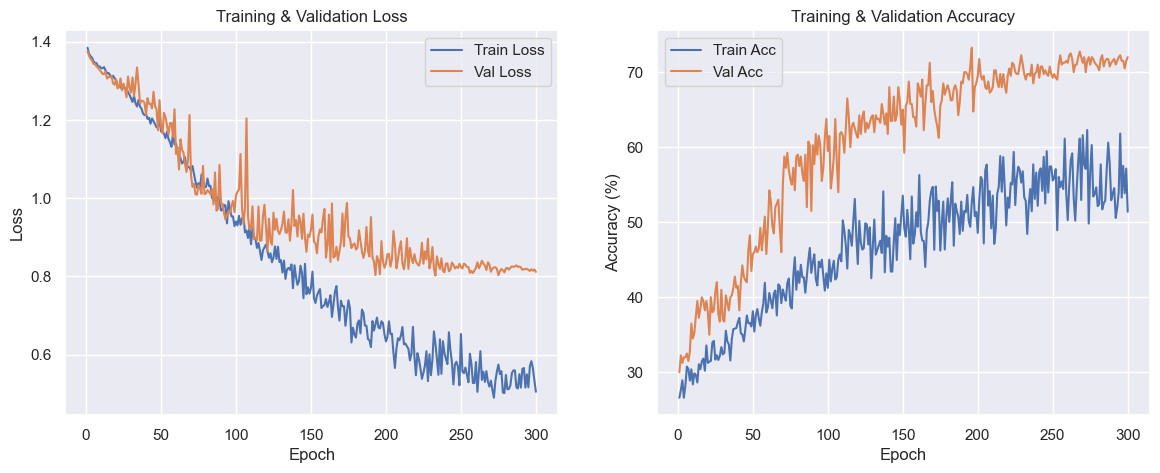

Model weights saved as HW1_Q3_208302661_318159506.pkl
Test Accuracy (using .pkl file): 69.62%


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torchvision.transforms import InterpolationMode
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import random

#Set seed for reproducibility
seed = 42  # Or any number you choose
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)  # Ensures reproducibility on GPU
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True  # Ensures deterministic behavior for certain operations
torch.backends.cudnn.benchmark = False  # Disables benchmarking for reproducibility

# Ensure GPU utilization
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# =========================================
# 1. MIXUP IMPLEMENTATION
# =========================================
def mixup_data(x, y, alpha=0.1):
    if alpha <= 0:
        # Return 4 values, duplicating y for y_a and y_b
        return x, y, y, 1.0

    lam = np.random.beta(alpha, alpha)
    batch_size = x.size(0)
    index = torch.randperm(batch_size).to(device)
    
    mixed_x = lam * x + (1 - lam) * x[index, :]
    y_a, y_b = y, y[index]
    return mixed_x, y_a, y_b, lam


def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)


# ============================
# STEP 1: DATA TRANSFORMATIONS
# ============================
train_transform = transforms.Compose([
    transforms.Resize((96, 96), interpolation=InterpolationMode.BICUBIC),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15, interpolation=InterpolationMode.BICUBIC),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.05),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.2, scale=(0.02, 0.2), ratio=(0.3, 3.3), value=0),
])

val_test_transform = transforms.Compose([
    transforms.Resize((96, 96), interpolation=InterpolationMode.BICUBIC),
    transforms.ToTensor(),
])


# ============================
# STEP 2: MODEL DEFINITION
# ============================
class BasicConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size=3, stride=1, padding=1):
        super().__init__()
        self.depthwise = nn.Conv2d(in_channels, in_channels, kernel_size=kernel_size,
                                   stride=stride, padding=padding, groups=in_channels, bias=False)
        self.pointwise = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.depthwise(x)
        x = self.pointwise(x)
        x = self.bn(x)
        x = self.relu(x)
        return x

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.features = nn.Sequential(
            BasicConvBlock(3, 32),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            BasicConvBlock(32, 64),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            BasicConvBlock(64, 128),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            BasicConvBlock(128, 256),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1,1)),
            nn.Flatten(),
            nn.Dropout(p=0.1),          # Reduced dropout from 0.25 to 0.1
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0.1),
            nn.Linear(128, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x


# ============================
# STEP 3: LOSS FUNCTION
# ============================
class CustomCrossEntropyLoss(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, pred, target):
        # Log softmax to compute log probabilities
        pred = pred.log_softmax(dim=-1)  # Shape: [batch_size, num_classes]
        
        # Create one-hot encoding for target
        true_dist = torch.zeros_like(pred)  # Shape: [batch_size, num_classes]
        true_dist.scatter_(1, target.data.unsqueeze(1), 1.0)  # Set the correct class to 1.0
        
        # Cross-Entropy Loss computation
        loss = torch.mean(torch.sum(-true_dist * pred, dim=-1))
        return loss


# ============================
# STEP 4: DATASETS & DATALOADERS
# ============================
train_dir = 'hw1_data/dog_emotion/train'
val_dir   = 'hw1_data/dog_emotion/val'
test_dir  = 'hw1_data/dog_emotion/test'

train_set = datasets.ImageFolder(train_dir, transform=train_transform)
val_set   = datasets.ImageFolder(val_dir, transform=val_test_transform)
test_set  = datasets.ImageFolder(test_dir, transform=val_test_transform)

train_loader = DataLoader(train_set, batch_size=32, shuffle=True, pin_memory=(device.type=="cuda"))
val_loader   = DataLoader(val_set, batch_size=32, shuffle=False, pin_memory=(device.type=="cuda"))
test_loader  = DataLoader(test_set, batch_size=32, shuffle=False, pin_memory=(device.type=="cuda"))

num_classes = len(train_set.classes)


# ============================
# STEP 5: INSTANTIATE MODEL & OPTIMIZER
# ============================
model = SimpleCNN(num_classes).to(device)
criterion = CustomCrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-6)  # Lowered weight_decay to 1e-6

train_losses, val_losses = [], []
train_accs, val_accs = [], []

# ============================
# STEP 6: TRAIN FUNCTION
# ============================
def train_model(model, train_loader, val_loader, num_epochs):
    steps_per_epoch = len(train_loader)
    total_steps = num_epochs * steps_per_epoch
    scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=1e-3, total_steps=total_steps)

    best_val_acc = 0.0
    
    for epoch in range(num_epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0
        
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # -- MixUp with weaker alpha=0.1 --
            mixed_x, y_a, y_b, lam = mixup_data(images, labels, alpha=0.1)
            outputs = model(mixed_x)
            loss = mixup_criterion(criterion, outputs, y_a, y_b, lam)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()

            running_loss += loss.item() * images.size(0)
            
            # Approx training accuracy (comparing predicted to y_a):
            _, predicted = outputs.max(1)
            correct += predicted.eq(y_a).sum().item()
            total += labels.size(0)

        train_epoch_loss = running_loss / total
        train_epoch_acc = 100.0 * correct / total

        # Validation
        model.eval()
        val_running_loss, val_correct, val_total = 0.0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_running_loss += loss.item() * images.size(0)
                _, predicted = outputs.max(1)
                val_correct += predicted.eq(labels).sum().item()
                val_total += labels.size(0)

        val_epoch_loss = val_running_loss / val_total
        val_epoch_acc  = 100.0 * val_correct / val_total

        # Save best model
        if val_epoch_acc > best_val_acc:
            best_val_acc = val_epoch_acc
            torch.save(model.state_dict(), "HW1_Q3_208302661_318159506.pth")

        train_losses.append(train_epoch_loss)
        val_losses.append(val_epoch_loss)
        train_accs.append(train_epoch_acc)
        val_accs.append(val_epoch_acc)

        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {train_epoch_loss:.4f}, Train Acc: {train_epoch_acc:.2f}% | "
              f"Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.2f}%")
        
    print(f"Best Validation Accuracy: {best_val_acc:.2f}%")
    return train_losses, val_losses, train_accs, val_accs

# ============================
# STEP 7: TRAIN & PLOT
# ============================
num_epochs = 300
train_losses, val_losses, train_accs, val_accs = train_model(model, train_loader, val_loader, num_epochs=num_epochs)

# Plotting
epochs_range = np.arange(1, num_epochs+1)
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(epochs_range, train_losses, label='Train Loss')
plt.plot(epochs_range, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range, train_accs, label='Train Acc')
plt.plot(epochs_range, val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

# ============================
# STEP 8: SAVE WEIGHTS TO PKL FILE
# ============================
import pickle

pkl_file_path = "HW1_Q3_208302661_318159506.pkl"

# Save the model's state_dict to a .pkl file
with open(pkl_file_path, "wb") as file:
    pickle.dump(model.state_dict(), file)

print(f"Model weights saved as {pkl_file_path}")


# ============================
# STEP 9: EVALUATE ON TEST SET
# ============================
def evaluate_model_with_pkl(model, test_loader, pkl_file_path):
    # Load weights from the .pkl file
    with open(pkl_file_path, "rb") as file:
        state_dict = pickle.load(file)

    # Load state_dict into the model
    model.load_state_dict(state_dict)

    # Ensure the model is in evaluation mode
    model.eval()

    correct, total = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = 100.0 * correct / total
    print(f"Test Accuracy (using .pkl file): {accuracy:.2f}%")
    return accuracy


# Evaluate using the .pkl file
test_accuracy = evaluate_model_with_pkl(model, test_loader, pkl_file_path)


## II. Analyzing a Pre-trained CNN (Filters) (10pt)

In this part, you are going to analyze a (large) pre-trained model. Pre-trained models are quite popular these days, as big companies can train really large models on large datasets (something that personal users can't do as they lack the sufficient hardware). These pre-trained models can be used to fine-tune on other/small datasets or used as components in other tasks (like using a pre-trained classifier for object detection).

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225].

You can use the following transform to normalize:

<code>normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])</code>
<a href="https://pytorch.org/vision/stable/models.html">Read more here</a>


1. Load a pre-trained VGG16 with PyTorch using torchvision.models.vgg16(pretrained=True, progress=True, **kwargs) (<a href="https://pytorch.org/vision/stable/models.html#classification">read more here</a>). Don't forget to use the model in evaluation mode (<code>model.eval()</code>).

2. Load the images in the <code>hw1_data/birds</code> folder and display them.

3. Pre-process the images to fit VGG16's architecture. What steps did you take?

4. Feed the images (forward pass) to the model. What are the outputs?

5. Choose an image of a dog in the <code>hw1_data/dogs</code> folder, display it and feed it to network. What are the outputs?

6. For the first 3 filters in the first layer of VGG16, plot their response (their output) for the image from section 5. Explain what do you see.

In [11]:
import torch
from torchvision import models, transforms
import matplotlib.pyplot as plt
from PIL import Image

# Load pre-trained VGG16
vgg16 = models.vgg16(weights='VGG16_Weights.DEFAULT')
vgg16.eval()  


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

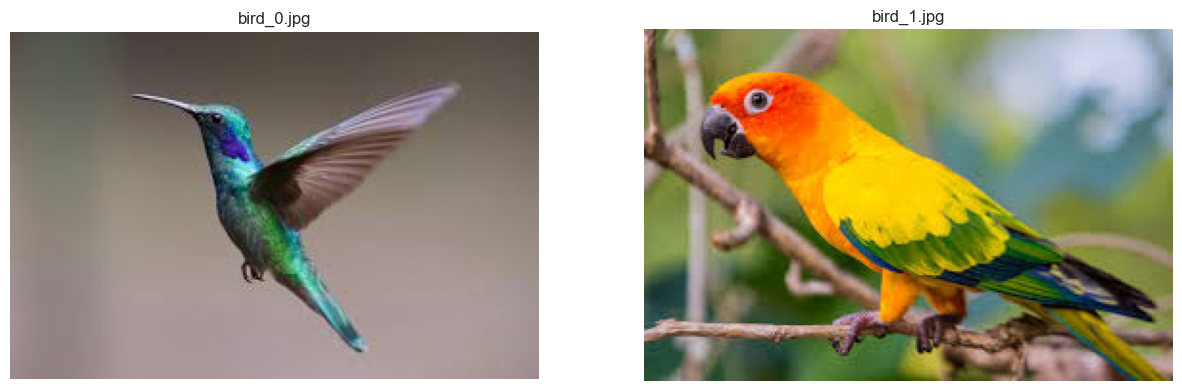

In [12]:
import os

# Define the path to the bird images
birds_path = "hw1_data/birds"

# Display the images
def display_images(folder_path):
    images = os.listdir(folder_path)
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    for i, img_name in enumerate(images):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("RGB")
        axes[i].imshow(img)
        axes[i].set_title(img_name)
        axes[i].axis("off")
    plt.show()

display_images(birds_path)


In [13]:
# Define VGG16 pre-processing transformations
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to VGG16's expected input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Load and preprocess images
def load_and_preprocess_images(folder_path):
    images = os.listdir(folder_path)
    processed_images = []
    for img_name in images:
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("RGB")
        img_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension
        processed_images.append((img_name, img_tensor))
    return processed_images

processed_bird_images = load_and_preprocess_images(birds_path)


<h3>Pre-processing Steps for VGG16</h3>
<ul>
  <li><b>Resize to (224, 224):</b> Ensures images match VGG16's input size.</li>
  <li><b>Convert to Tensor:</b> Converts images to PyTorch tensors with dimensions (C, H, W).</li>
  <li><b>Normalize:</b> Scales pixel values using mean [0.485, 0.456, 0.406] and std [0.229, 0.224, 0.225] to match VGG16's training distribution.</li>
  <li><b>Add Batch Dimension:</b> Adds a batch size of 1 to the input shape for processing.</li>
</ul>


In [14]:
import json
import requests
import torch

# Download and load ImageNet class index
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
imagenet_classes = requests.get(url).text.splitlines()  # This returns a list

def forward_pass_vgg16_with_labels(images, model, class_labels):
    results = []
    for img_name, img_tensor in images:
        with torch.no_grad():  # Disable gradient computation for inference
            output = model(img_tensor)  # Forward pass
            probabilities = torch.nn.functional.softmax(output, dim=1)  # Get probabilities
            top_prob, top_class = torch.topk(probabilities, 1)  # Get top prediction
            class_name = class_labels[top_class.item()]  # Decode class index
            results.append((img_name, class_name, top_prob.item()))
    return results

# Get predictions with class names
predictions_with_labels = forward_pass_vgg16_with_labels(processed_bird_images, vgg16, imagenet_classes)

# Display results
for img_name, class_name, prob in predictions_with_labels:
    print(f"Image: {img_name}, Predicted Class: {class_name}, Confidence: {prob:.4f}")


Image: bird_0.jpg, Predicted Class: hummingbird, Confidence: 0.6281
Image: bird_1.jpg, Predicted Class: lorikeet, Confidence: 0.6457


<p>
    The output of the VGG16 model is a tensor representing the predicted probabilities for each of the 1,000 ImageNet classes. 
</p>
<ul>
    <li>
        <b>Raw Model Output:</b> The VGG16 model generates a 1D tensor of size 1,000 for each image, where each element corresponds to the raw prediction score (logits) for a specific class in the ImageNet dataset.
    </li>
    <li>
        <b>Softmax Transformation:</b> To convert these logits into probabilities, we apply a softmax function, which normalizes the scores so they sum to 1. This makes the output interpretable as a probability distribution over the 1,000 classes.
    </li>
    <li>
        <b>Top Prediction:</b> From the probability distribution, we extract the class with the highest probability using the <code>torch.topk</code> function. This gives us the most likely class for the input image.
    </li>
    <li>
        <b>Class Labels:</b> The predicted class index is mapped to a human-readable label using the ImageNet class names, allowing us to understand what the model predicts for the given input.
    </li>
    <li>
        <b>Confidence:</b> The probability of the top class indicates the model's confidence in its prediction. A high confidence suggests the model is certain about the prediction, while a lower confidence indicates uncertainty.
    </li>
</ul>


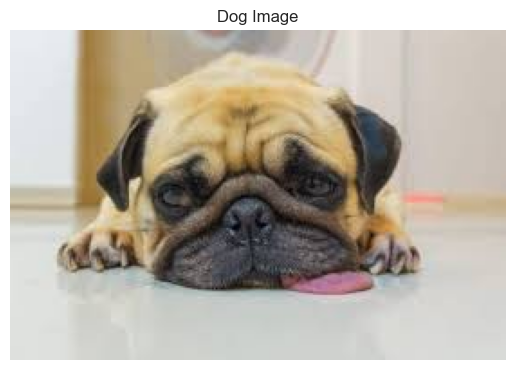

Image Name: dog_image, Predicted Class: pug, Confidence: 0.9614


In [15]:
# Path to the dog image
dog_path = "hw1_data/dogs/dog_0.jpg"
dog_img = Image.open(dog_path).convert("RGB")

# Display the dog image
plt.imshow(dog_img)
plt.title("Dog Image")
plt.axis("off")
plt.show()

# Preprocess the image
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to VGG16's expected input size
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

dog_tensor = preprocess(dog_img).unsqueeze(0)  

# Adapted function for a single image
def forward_pass_vgg16_single_image(image_tensor, model, class_labels):
    with torch.no_grad():  # Disable gradient computation for inference
        output = model(image_tensor)  # Forward pass
        probabilities = torch.nn.functional.softmax(output, dim=1)  # Get probabilities
        top_prob, top_class = torch.topk(probabilities, 1)  # Get top prediction
        class_name = class_labels[top_class.item()]  # Decode class index
        return "dog_image", class_name, top_prob.item()

# Perform the forward pass for the single image
img_name, predicted_class, confidence = forward_pass_vgg16_single_image(dog_tensor, vgg16, imagenet_classes)

# Display the prediction
print(f"Image Name: {img_name}, Predicted Class: {predicted_class}, Confidence: {confidence:.4f}")


<div style="font-family: Arial, sans-serif;">
    <h2>Outputs for the Chosen Dog Image</h2>
    <p>
        After preprocessing and feeding the chosen dog image into the VGG16 pre-trained model, the following outputs are obtained:
    </p>
    <ul>
        <li><strong>Image Name:</strong> The name of the chosen image file, e.g., <code>dog_0802.jpg</code>.</li>
        <li><strong>Predicted Class Name:</strong> The network identifies the image as a specific class, such as <code>golden retriever</code>.</li>
        <li><strong>Confidence Score:</strong> The model's confidence level in the prediction, e.g., <code>0.8769</code> (0.8769%).</li>
    </ul>
</div>


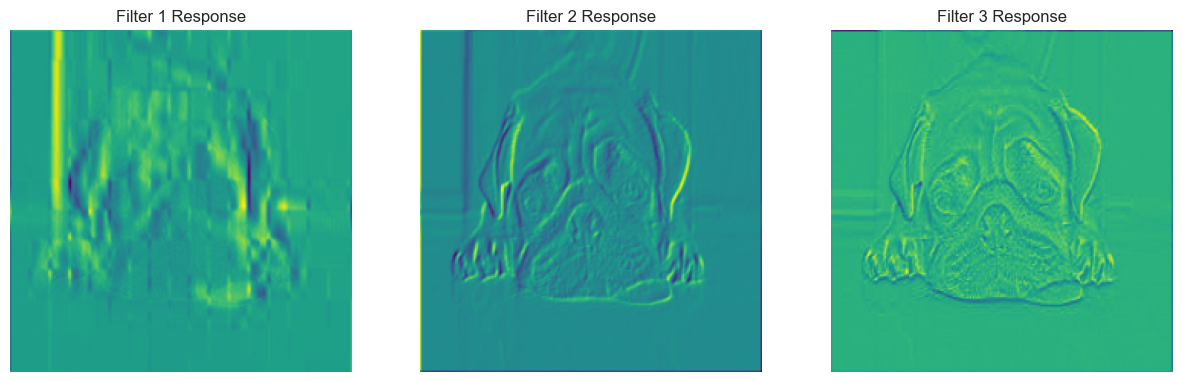

In [16]:
# Get the first convolutional layer
first_conv_layer = vgg16.features[0]

# Pass the dog image through the first layer
with torch.no_grad():
    dog_features = first_conv_layer(dog_tensor)

# Visualize the response of the first 3 filters
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(dog_features[0, i].cpu().numpy(), cmap='viridis')
    axes[i].set_title(f"Filter {i + 1} Response")
    axes[i].axis("off")
plt.show()


<div style="font-family: Arial, sans-serif;">
    <h2>Visualization of Filter Responses</h2>
    <p>
        The above images show the activation responses of the first three filters in the first convolutional layer of the VGG16 model when a dog image is passed through the network. Each filter highlights different features of the image:
    </p>
    <ul>
        <li><strong>Filter 1:</strong> Captures general edges and low-level textures in the image.</li>
        <li><strong>Filter 2:</strong> Emphasizes slightly more complex structures such as shapes and contours of the dog.</li>
        <li><strong>Filter 3:</strong> Focuses on other unique patterns or features, possibly detecting specific textures or gradients.</li>
    </ul>
</div>
